# Opis zadania i użyte narzędzia

Zadaniem było zaimplementowanie programu, który współbieżnie rozwiązuje problem eliminacji Gaussa, a także wyprowadzenie formalnego modelu równoległości dla tego problemu.
Do zrobienia zadania użyłem środowiska Google Collab, gdyż posiada ono dostęp do GPU. Całość kodu znajduje się w tym notebooku, a także w załączonych plikach Graph.py oraz Node.py.

# Wyprowadzenie grafu zależności
Do wyprowadzenia grafu zależności Diekerta i znalezienia postaci normalnej Foanty użyłem kodu z ostatniego sprawozdania. Do wizualizacji grafu użyłem biblioteki graphviz. Dodatkową klasą jest klasa Node, która opisuje pojedynczy operację wykonywaną podczas algorytmu eliminacji. Najważniejsza w klasie jest metoda related(), która sprawdza czy dwie operacja są ze sobą w relacji. Należy jednak zaznaczyć, że ta funckja uwzględnia jedynie operacje, które są "najbliżej" i modyfikują lub korzystają z tych samych danych. Faktyczna relacja zależności dla tego alfabetu jest domknięciem tranzytywnym relacji, którą uwzględniam w metodzie. Faktyczna relacja może zawierać nawet $n^{6}$ par, gdzie $n$ to ilość wierszy podanej macierzy, więc uznałem, że szukanie całej relacji nie ma sensu.

In [ ]:
!pip install graphviz

Do środowiska Collaba należy zaimportować pliki Graph oraz Node.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Graph.py to Graph.py
Saving Node.py to Node.py


In [3]:
import graphviz
from Graph import Graph
from Node import Node, Op

In [4]:
from IPython.display import Image, display


def graph_image(graph, save):
    dot = graphviz.Digraph(format='png')
    for i in graph.vertices:
        for j in graph.neighbors[i]:
            dot.edge(str(i), str(j))

    for i in graph.vertices:
        dot.node(str(i), str(graph.trace[i]))

    dot.render(f"graph_plots/{save}")


def create_trace(n):
    trace = []
    for i in range(1, n):
        for k in range(i + 1, n + 1):
            trace.append(Node(Op.FIND, i, -1, k))
            for j in range(i, n + 2):
                trace.append(Node(Op.MUL, i, j, k))
                trace.append(Node(Op.SUB, i, j, k))
    return trace

def diekert_graph(matrix_size, file_name="graph", image_width=1000):
    trace = create_trace(matrix_size)
    print(f"Trace: {trace}")
    graph = Graph(trace)
    print(f"FNF: {graph.foata_normal_form()}")
    graph.reduce_graph()
    graph_image(graph, save=file_name)
    display(Image(f"graph_plots/{file_name}.png", width=image_width))

Przykładowe uzyskane grafy

Trace: [A12, B112, C112, B122, C122, B132, C132]
FNF: (A12 )(B112 B122 B132 )(C112 C122 C132 )


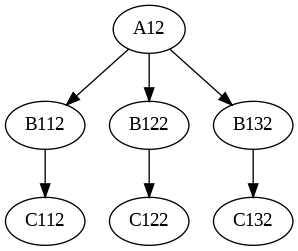

In [5]:
diekert_graph(2, file_name="graph2", image_width=500)

Trace: [A12, B112, C112, B122, C122, B132, C132, B142, C142, A13, B113, C113, B123, C123, B133, C133, B143, C143, A23, B223, C223, B233, C233, B243, C243]
FNF: (A12 A13 )(B112 B122 B132 B142 B113 B123 B133 B143 )(C112 C122 C132 C142 C113 C123 C133 C143 )(A23 )(B223 B233 B243 )(C223 C233 C243 )


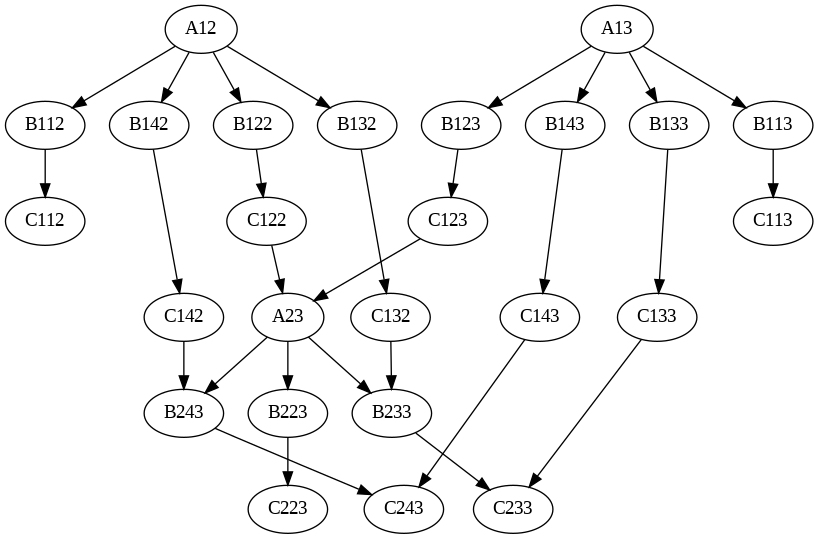

In [6]:
diekert_graph(3, file_name="graph3", image_width=500)

Trace: [A12, B112, C112, B122, C122, B132, C132, B142, C142, B152, C152, A13, B113, C113, B123, C123, B133, C133, B143, C143, B153, C153, A14, B114, C114, B124, C124, B134, C134, B144, C144, B154, C154, A23, B223, C223, B233, C233, B243, C243, B253, C253, A24, B224, C224, B234, C234, B244, C244, B254, C254, A34, B334, C334, B344, C344, B354, C354]
FNF: (A12 A13 A14 )(B112 B122 B132 B142 B152 B113 B123 B133 B143 B153 B114 B124 B134 B144 B154 )(C112 C122 C132 C142 C152 C113 C123 C133 C143 C153 C114 C124 C134 C144 C154 )(A23 A24 )(B223 B233 B243 B253 B224 B234 B244 B254 )(C223 C233 C243 C253 C224 C234 C244 C254 )(A34 )(B334 B344 B354 )(C334 C344 C354 )


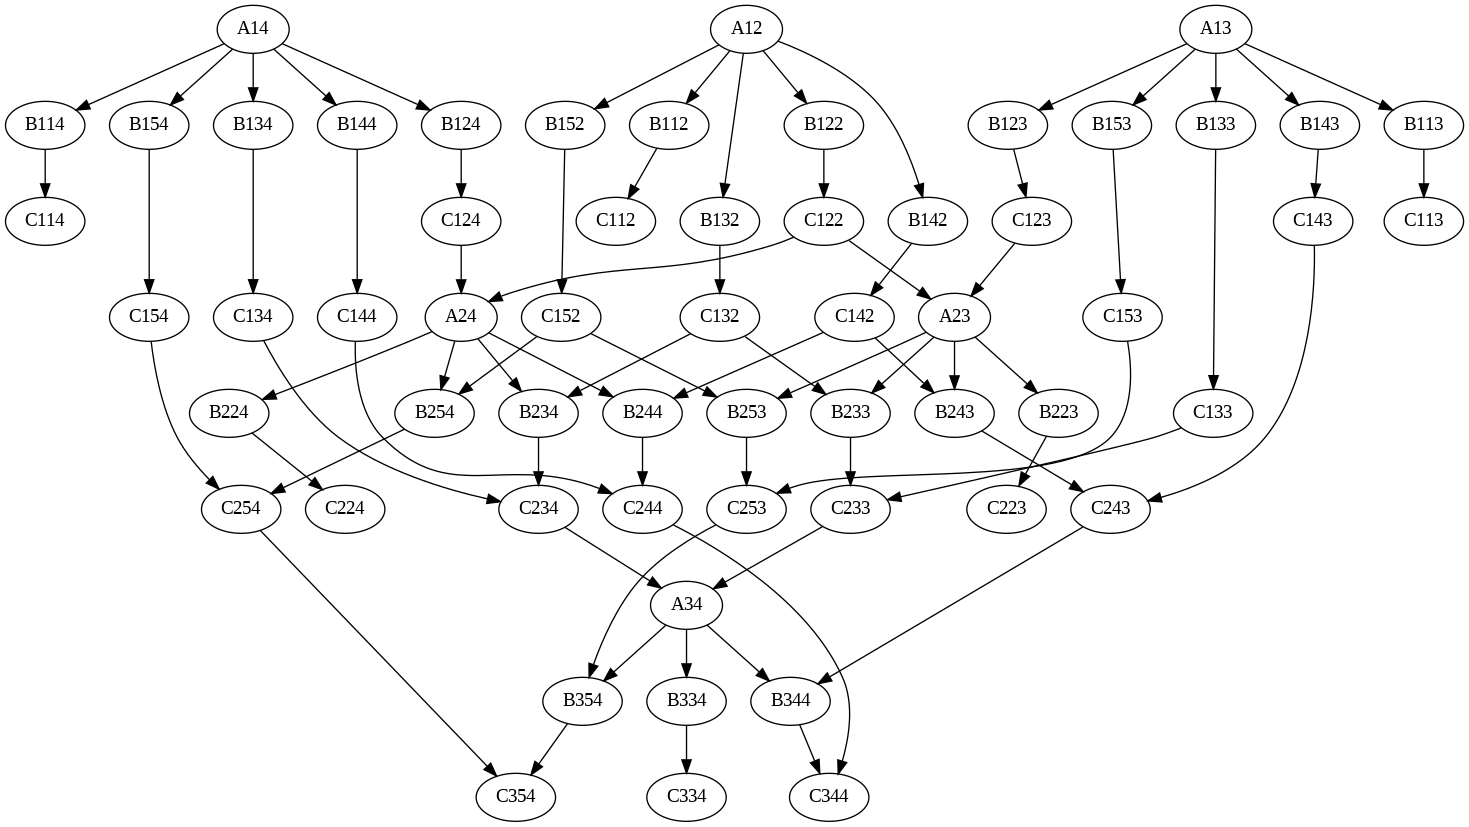

In [7]:
diekert_graph(4, file_name="graph4", image_width=700)

Trace: [A12, B112, C112, B122, C122, B132, C132, B142, C142, B152, C152, B162, C162, A13, B113, C113, B123, C123, B133, C133, B143, C143, B153, C153, B163, C163, A14, B114, C114, B124, C124, B134, C134, B144, C144, B154, C154, B164, C164, A15, B115, C115, B125, C125, B135, C135, B145, C145, B155, C155, B165, C165, A23, B223, C223, B233, C233, B243, C243, B253, C253, B263, C263, A24, B224, C224, B234, C234, B244, C244, B254, C254, B264, C264, A25, B225, C225, B235, C235, B245, C245, B255, C255, B265, C265, A34, B334, C334, B344, C344, B354, C354, B364, C364, A35, B335, C335, B345, C345, B355, C355, B365, C365, A45, B445, C445, B455, C455, B465, C465]
FNF: (A12 A13 A14 A15 )(B112 B122 B132 B142 B152 B162 B113 B123 B133 B143 B153 B163 B114 B124 B134 B144 B154 B164 B115 B125 B135 B145 B155 B165 )(C112 C122 C132 C142 C152 C162 C113 C123 C133 C143 C153 C163 C114 C124 C134 C144 C154 C164 C115 C125 C135 C145 C155 C165 )(A23 A24 A25 )(B223 B233 B243 B253 B263 B224 B234 B244 B254 B264 B225 B235 

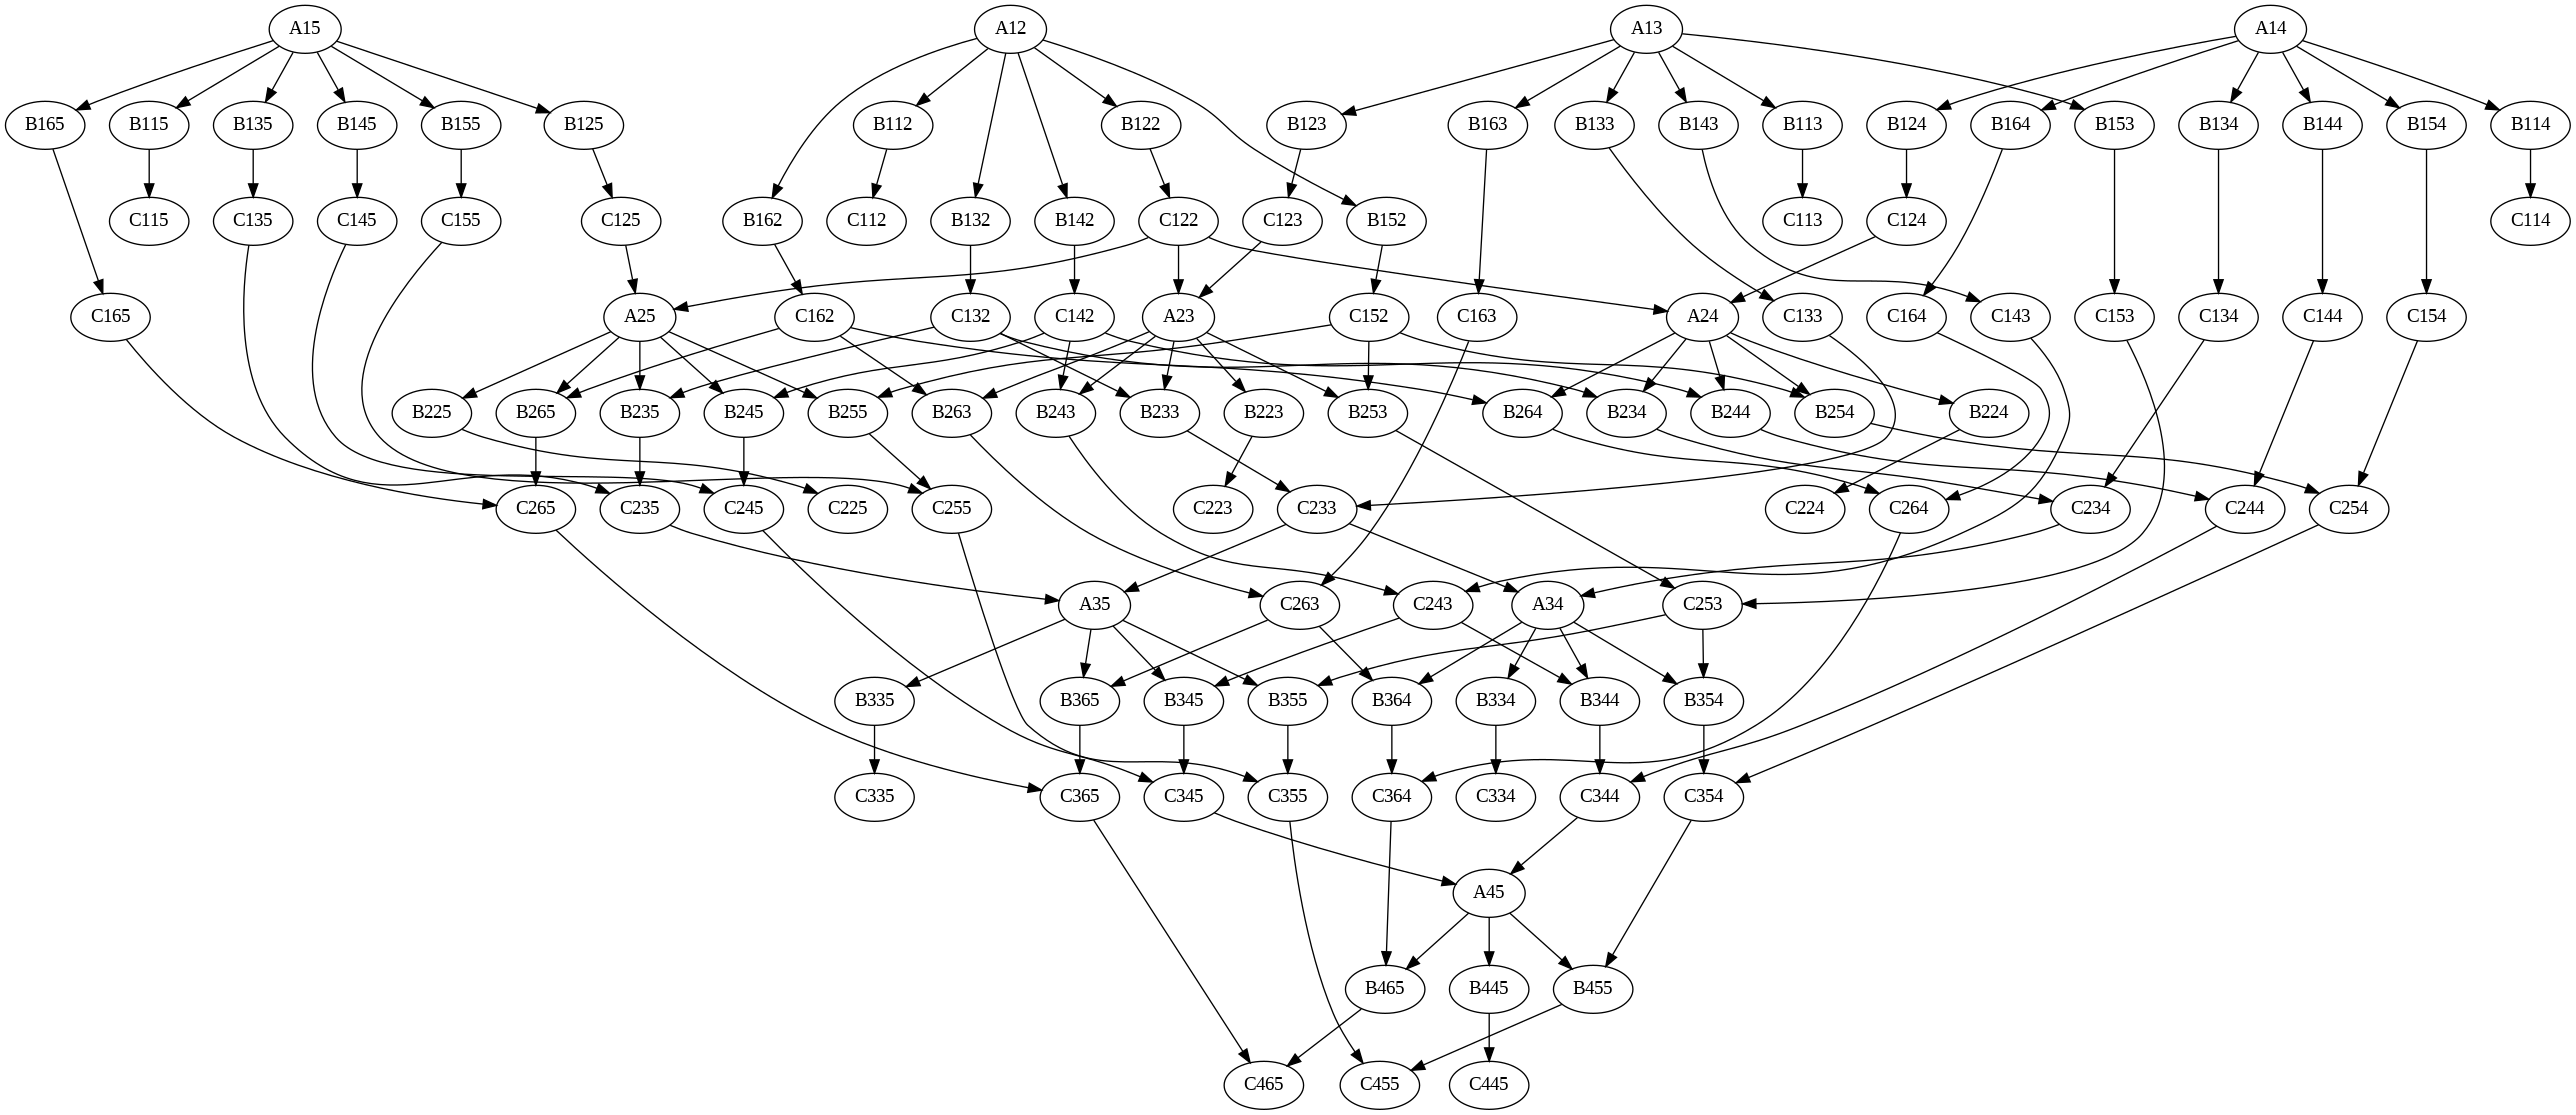

In [8]:
diekert_graph(5, file_name="graph5", image_width=800)

Na podstawie powyższych grafów i postaci normalnej foanty, widać jak w ogólnym przypadku należy pogrupować taski w algorytmie eliminacji.

# Implementacja algorytmu

Do implementacji użyłem biblioteki numba.cuda. W tej bibliotec

In [10]:
from numba import cuda
import numpy as np

In [11]:
cuda.detect()

Found 1 CUDA devices
id 0    b'Tesla V100-SXM2-16GB'                              [SUPPORTED]
                      Compute Capability: 7.0
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-d03dec9c-0ac7-17c2-b127-40bb461b694b
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 2
Summary:
	1/1 devices are supported


True

Funkcja do pomiaru czasu działania

In [12]:
from time import perf_counter

def timeit(func):
    def wrapper(*args, **kwargs):
        t1 = perf_counter()
        res = func(*args, **kwargs)
        t2 = perf_counter()
        return res, round(t2 - t1, 6)
    return wrapper

Zwykła iteracyjna eliminacja gaussa. Do sprawdzania poprawności implementacji wielowątkowej i porównaniu czasu działania

In [13]:
@timeit
def simple_gauss(matrix):
    n = matrix.shape[0]
    m = matrix.shape[1]
    for i in range(n - 1):
        for j in range(i+1, n):
            scale = matrix[j, i] / matrix[i, i]
            for k in range(i, m):
                matrix[j, k] -= matrix[i, k]*scale
    return matrix

Funkcje definiujące pojedyczne działania w implementacji wielowątkowej. Jako, że operacje B i C są zawsze wykonywane po sobie i korzystają z tych samych danych, to ich nie rozdzielałem.

In [17]:
from numba import float32

@cuda.jit
def A(m, s, shift):
    i = cuda.grid(1)
    i += shift
    if i > shift and i < m.shape[0]:
        s[i] = m[i, shift] / m[shift, shift]


@cuda.jit
def BC(m, s, shift):
    i, j = cuda.grid(2)
    i += shift
    j += shift
    if i > shift and i < m.shape[0] and j < m.shape[1]:
        m[i, j] -= s[i]*m[shift, j]


In [18]:
@timeit
def multithread_gauss(mat):
    n = mat.shape[0]
    scalars = np.zeros(n)
    mat_device = cuda.to_device(mat)
    scalars_device = cuda.to_device(scalars)
    for i in range(n - 1):
        TPB = 32
        t_x = int(np.ceil((n - i) / TPB))
        t_y = int(np.ceil((n+1 - i) / TPB))
        A[(t_x, ), (TPB, )](mat_device, scalars_device, i)
        BC[(t_x, t_y), (TPB, TPB)](mat_device, scalars_device, i)

    return mat_device.copy_to_host()

Czasami numba informowała, o tym że ustawione parametry siatki są nieoptymalne, szczególnie w ostatnich krokach algorytmu, gdy liczba odpalancyh wątków była bardzo mała, a wypisywanie tych warningów wpływało na pomiary czasowe.

In [20]:
from numba.core.errors import NumbaPerformanceWarning
import warnings

warnings.simplefilter('ignore', category=NumbaPerformanceWarning)

In [21]:
def compare_matrices(m1, m2):
    try:
        assert np.allclose(m1, m2)
    except AssertionError:
        raise AssertionError("Matrices are different")
    else:
        print("OK")

def test_correctness():
    for s in [5, 10, 20, 30, 40, 50, 60, 100, 150, 200, 300, 500]:
        mat = np.random.rand(s, s + 1)
        m1, _ = simple_gauss(mat)
        m2, _ = multithread_gauss(mat)
        compare_matrices(m1, m2)
    print("Tests passed")

test_correctness()

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
Tests passed


Jak widać implementacja wielowątkowa daje ten sam wynik co algorytm jednowątkowy.

# Pomiary czasu wykonania

In [24]:
sizes1 = [5, 10, 20, 30, 40, 50, 60, 100, 150, 200, 300, 500]
sizes2 = [1000, 2000, 4000, 5000, 7500, 10000, 12000, 15000]

time_one_thread = []
time_multi_thread = []

def test_perfomence():
    for s in sizes1:
        print(s)
        mat = np.random.rand(s, s + 1)
        m1, t1 = simple_gauss(mat)
        m2, t2 = multithread_gauss(mat)
        time_one_thread.append(t1)
        time_multi_thread.append(t2)

    for s in sizes2:
        print(s)
        mat = np.random.rand(s, s + 1)
        m2, t2 = multithread_gauss(mat)
        time_multi_thread.append(t2)


test_perfomence()

5
10
20
30
40
50
60
100
150
200
300
500
1000
2000
4000
5000
7500
10000
12000
15000


Text(0.5, 0, 'matrix size')

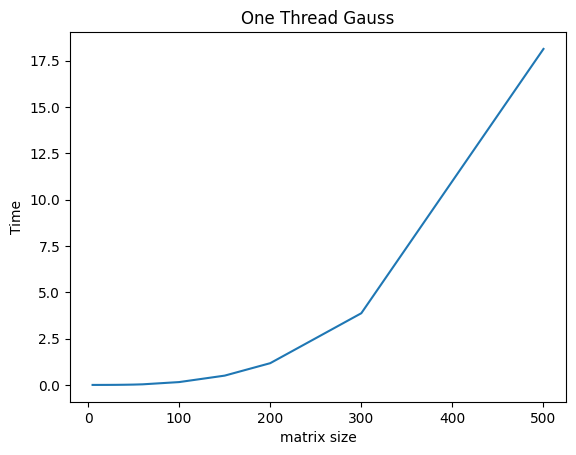

In [25]:
import matplotlib.pyplot as plt

plt.plot(sizes1, time_one_thread)
plt.title("One Thread Gauss")
plt.ylabel("Time")
plt.xlabel("matrix size")

Text(0.5, 0, 'matrix size')

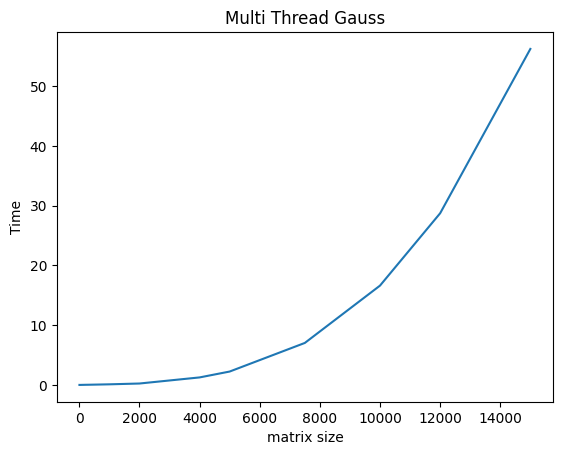

In [26]:
plt.plot(sizes1 + sizes2, time_multi_thread)
plt.title("Multi Thread Gauss")
plt.ylabel("Time")
plt.xlabel("matrix size")

Jednowątkowy algorytm dla macierzy wielkości 500 działał już bardzo długo, podczas, gdy wielowątkowy potrzebował około 0.1 sekundy na macierz z 1000 wierszy.